<a href="https://colab.research.google.com/github/AlexLeop/ML_Departamento_Marketing/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Departamento de Marketing**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
cartaocredito_df = pd.read_csv('/content/Marketing_data.csv')

In [7]:
cartaocredito_df.shape

(8950, 18)

In [8]:
cartaocredito_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
cartaocredito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
cartaocredito_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Pré-processamento dos Dados**

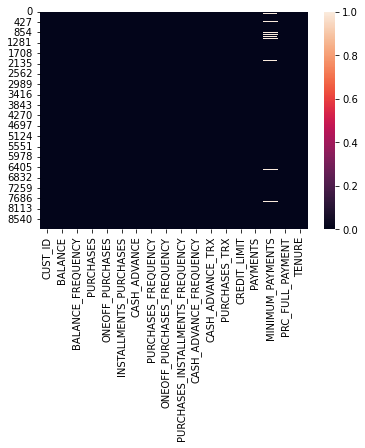

In [11]:
""" Verificando valores nulos por gráfico de calor """

sns.heatmap(cartaocredito_df.isnull());

In [12]:
""" Realisando o somatório dos dados nulos """

cartaocredito_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Tratando dados nulos por meio da MÉDIA

In [13]:
"""Localizando registros nulos da coluna MINIMUM_PAYMENTS"""
cartaocredito_df.loc[(cartaocredito_df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS')] = cartaocredito_df['MINIMUM_PAYMENTS'].mean()

In [14]:
"""Localizando registros nulos da coluna CREDIT_LIMIT"""
cartaocredito_df.loc[(cartaocredito_df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT')] = cartaocredito_df['CREDIT_LIMIT'].mean()

In [15]:
""" Realisando o somatório dos dados nulos """

cartaocredito_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

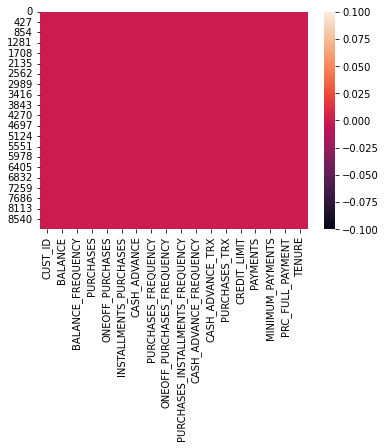

In [16]:
""" Verificando valores nulos por gráfico de calor """

sns.heatmap(cartaocredito_df.isnull());

Verificando dados duplicados

In [17]:
cartaocredito_df.duplicated().sum() # Somatório de dados duplicados no Dataset

0

In [18]:
""" Excluindo do Dataset atributos com valores unitários """

cartaocredito_df.drop('CUST_ID', axis=1, inplace=True)

# **Visualização e Exploração dos Dados**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

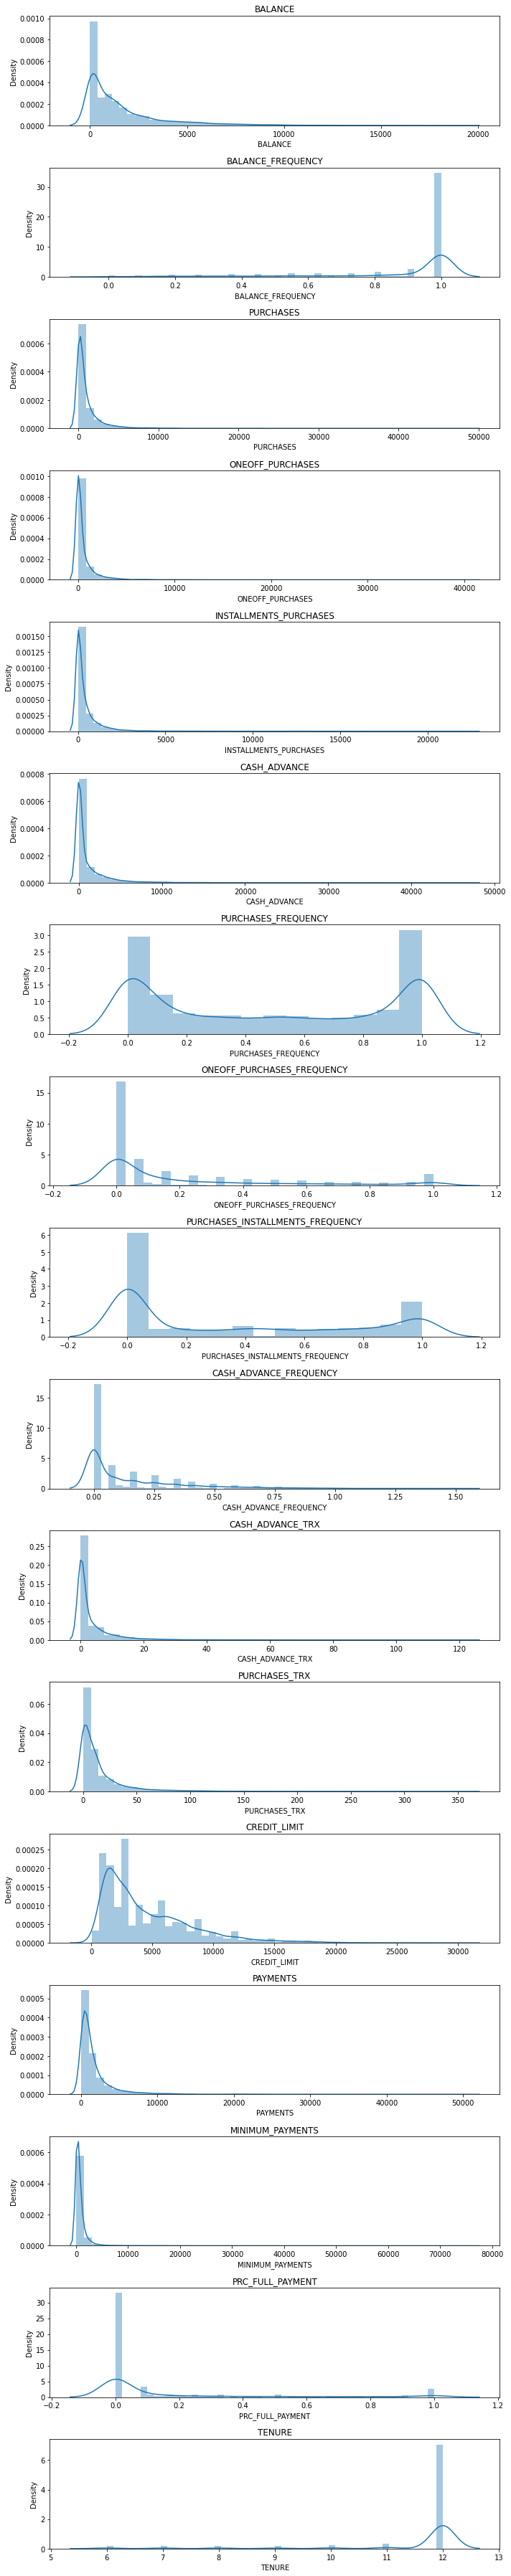

In [19]:
""" Gerando gráfico de histograma para cada coluna no Dataset """

plt.figure(figsize=(10,50))
for i in range(len(cartaocredito_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(cartaocredito_df[cartaocredito_df.columns[i]], kde=True);
    plt.title(cartaocredito_df.columns[i])

plt.tight_layout();

In [20]:
correlacao = cartaocredito_df.corr() # Gerando a correlação entre atributos do Dataset

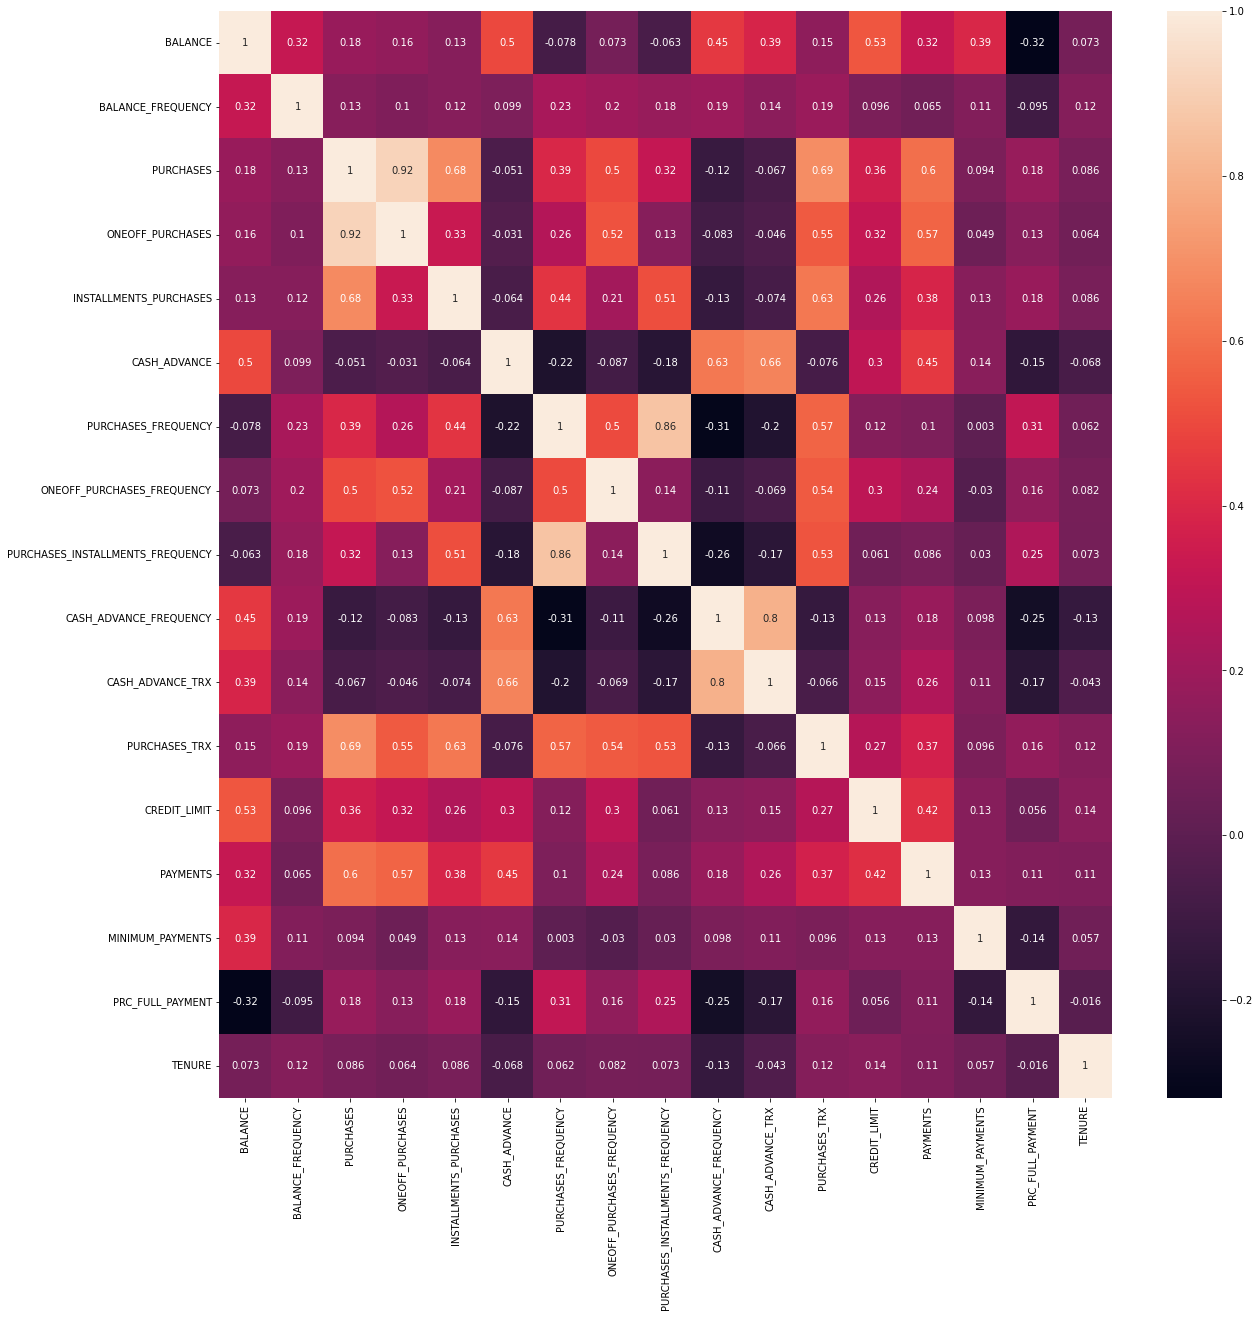

In [21]:
fig, axs = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True);

### **Definição do Numero de Clusters utilizando o Elbow Method**

In [22]:
min(cartaocredito_df['BALANCE']), max(cartaocredito_df['BALANCE']) # Verificando valores minimos e maximos do Dataset

(0.0, 19043.13856)

In [23]:
""" Normalizando os dados """
scaler = StandardScaler() # Instanciando o método de escala
cartaocredito_df_scale = scaler.fit_transform(cartaocredito_df)

In [24]:
min(cartaocredito_df_scale[0]), max(cartaocredito_df_scale[0]) # Verificando valores minimos e maximos do Dataset

(-0.9604333444542572, 0.36067954425377496)

In [25]:
cartaocredito_df_scale # Verificando a escala

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [26]:
""" Definindo o numero de Clusters percorrendo todo o dataset já normalizado em escala e utilizando o algoritimo KMeans
para o agrupamento dos resultados que serão atribuido a lista WCSS_1"""

WCSS_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cartaocredito_df_scale)
    WCSS_1.append(kmeans.inertia_)

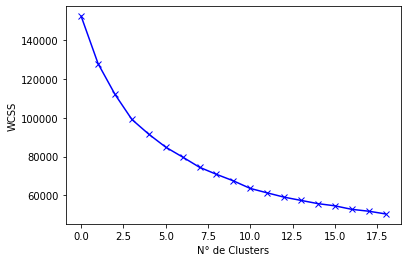

In [27]:
""" Plotando o gráfico da formula do WCSS """

plt.plot(WCSS_1, 'bx-')
plt.xlabel('N° de Clusters')
plt.ylabel('WCSS');

# **Agrupamento com KMeans**

In [28]:
kmeans = KMeans(n_clusters=8) # Definindo a quantidade de centróides
kmeans.fit(cartaocredito_df_scale) # Executando o treinamento do KMeans
labels = kmeans.labels_ 

In [29]:
labels, len(labels)

(array([0, 5, 1, ..., 3, 3, 3], dtype=int32), 8950)

In [30]:
np.unique(labels, return_counts = True) # Verificando o somatório por agrupamento

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2754, 1126,   23,  623,  353,  873, 1184, 2014]))

In [31]:
kmeans.cluster_centers_ # Média dos centróides

array([[ 1.19689126e-02,  4.04223657e-01, -3.56775016e-01,
        -2.41607141e-01, -3.99604624e-01, -9.47416558e-02,
        -8.51572479e-01, -3.93629115e-01, -7.53818262e-01,
         1.02262386e-01, -2.89624053e-02, -4.81221828e-01,
        -3.03082301e-01, -2.50426514e-01, -1.19854574e-02,
        -4.55333794e-01,  2.73614419e-01],
       [-1.28427209e-01,  4.00340289e-01,  5.43126680e-01,
         6.71408720e-01,  5.05341247e-02, -3.28839032e-01,
         9.81778278e-01,  1.90084486e+00,  1.78790696e-01,
        -4.12331597e-01, -3.28753069e-01,  6.22432323e-01,
         4.39332114e-01,  1.51692061e-01, -1.57276034e-01,
         4.41712171e-01,  2.69099363e-01],
       [ 1.86590651e+00,  3.32878117e-01,  1.25968437e+01,
         1.31111821e+01,  5.69638874e+00, -4.17760945e-03,
         1.03332159e+00,  2.17063444e+00,  8.66220718e-01,
        -4.76183389e-01, -2.14853617e-01,  4.56655817e+00,
         3.17419740e+00,  8.99113558e+00,  1.06481726e+00,
         1.23631700e+00,  2.9

In [32]:
""" Criando um DataFrame para melhor visualização e analise dos centróides gerados no KMeans """
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [cartaocredito_df.columns])

In [33]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.011969,0.404224,-0.356775,-0.241607,-0.399605,-0.094742,-0.851572,-0.393629,-0.753818,0.102262,-0.028962,-0.481222,-0.303082,-0.250427,-0.011985,-0.455334,0.273614
1,-0.128427,0.400340,0.543127,0.671409,0.050534,-0.328839,0.981778,1.900845,0.178791,-0.412332,-0.328753,0.622432,0.439332,0.151692,-0.157276,0.441712,0.269099
2,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
3,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
4,1.039759,0.463618,2.525761,1.834818,2.601281,-0.134424,1.161850,1.565375,1.266677,-0.273197,-0.135675,3.137294,1.303810,1.477503,0.561811,0.261235,0.337394
5,1.686049,0.392738,-0.221783,-0.159419,-0.231591,2.010260,-0.476399,-0.210727,-0.416210,1.917744,1.922678,-0.270361,1.025271,0.814508,0.553091,-0.391535,0.069847
6,-0.701258,-2.140285,-0.310336,-0.234722,-0.302444,-0.322272,-0.554827,-0.441460,-0.440553,-0.521236,-0.376356,-0.419376,-0.176011,-0.202115,-0.256800,0.283165,0.198977
7,-0.361015,0.332623,-0.034870,-0.242883,0.363577,-0.363522,0.993884,-0.384169,1.206214,-0.473762,-0.360498,0.191198,-0.261149,-0.215706,-0.029897,0.314283,0.256155


In [34]:
""" Realizando o processo inverso de escala dos dados para obter os valores reais (na média). Porém agora por divididos
por centróides indentificados pelo indice de cada linha """

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cartaocredito_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1589.387109,0.973028,240.949514,191.419002,49.710142,780.193435,0.148573,0.085030,0.064851,0.155608,3.051180,2.748457,3391.712039,1008.183631,836.274939,0.020537,11.883485
1,1297.164433,0.972108,2163.603357,1706.838330,456.765027,289.280301,0.884386,0.769517,0.435493,0.052632,1.005329,30.181172,6092.919425,2172.277504,497.681379,0.282908,11.877442
2,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
3,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
4,3728.646137,0.987098,6399.532663,3637.858669,2763.373711,696.978227,0.956657,0.669439,0.867847,0.080475,2.322946,92.691218,9238.243626,6010.369200,2173.483036,0.230121,11.968839
5,5073.843914,0.970307,529.360999,327.835040,201.642687,5194.480946,0.299149,0.139594,0.199025,0.518904,16.369690,7.989667,8224.804300,4091.063379,2153.161079,0.039197,11.610792
6,104.865352,0.370257,340.166450,202.846306,137.571031,303.051343,0.267672,0.070762,0.189350,0.030840,0.680473,4.285714,3854.048558,1148.040394,265.744196,0.236535,11.783601
7,813.051864,0.956066,928.703621,189.300977,739.845739,216.548132,0.889244,0.087853,0.843818,0.040340,0.788690,19.462302,3544.280854,1108.694819,794.533230,0.245637,11.860119


In [35]:
""" Concatenando cada atributo original ao seu respectivo cluster """
cartaocredito_df_cluster = pd.concat([cartaocredito_df, pd.DataFrame({'cluster':labels})], axis=1)
cartaocredito_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


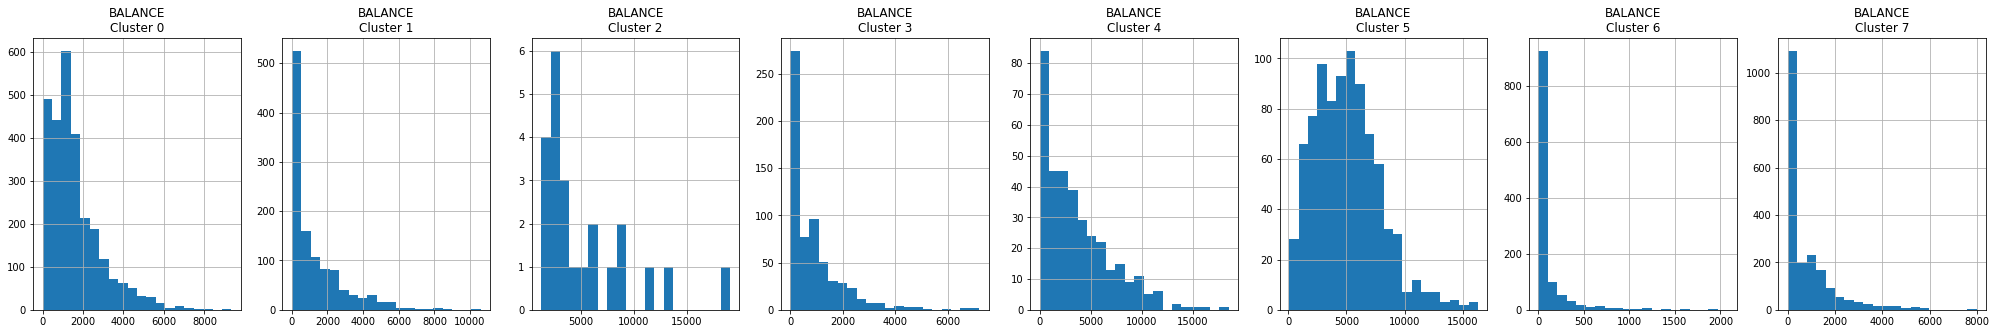

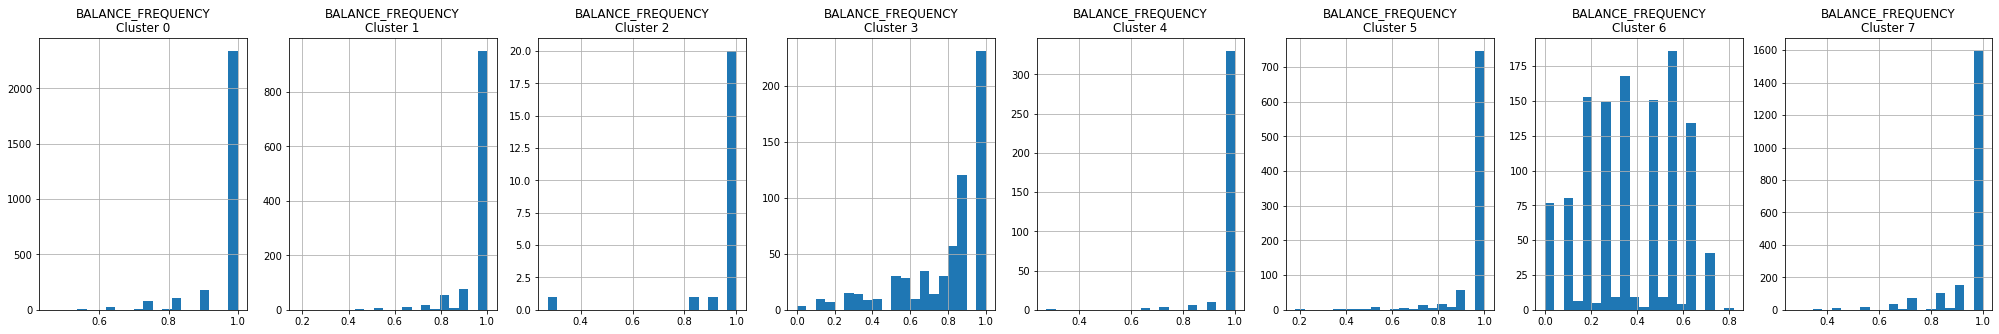

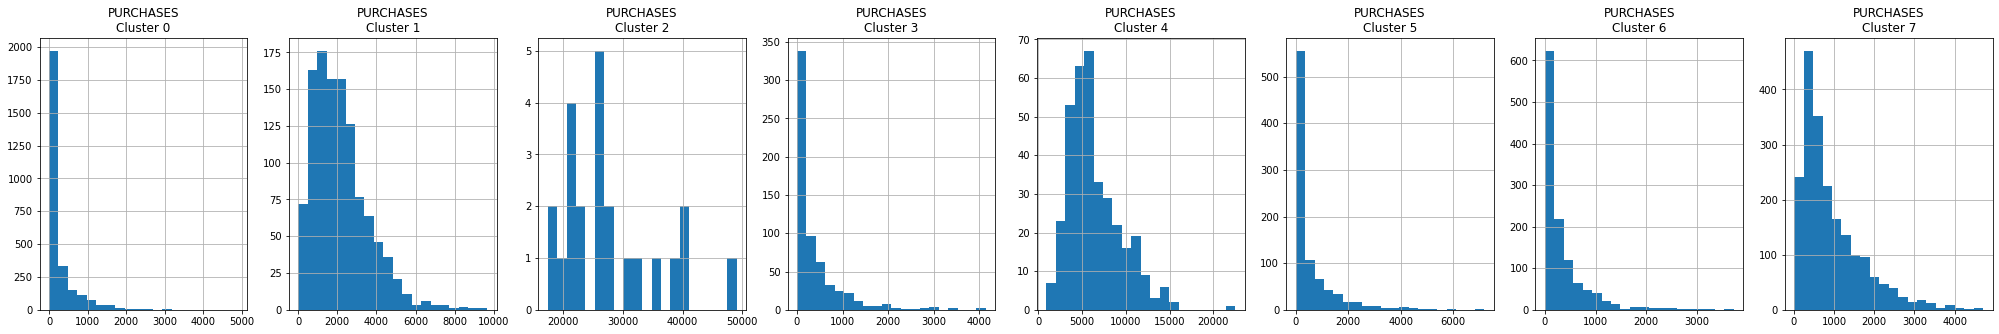

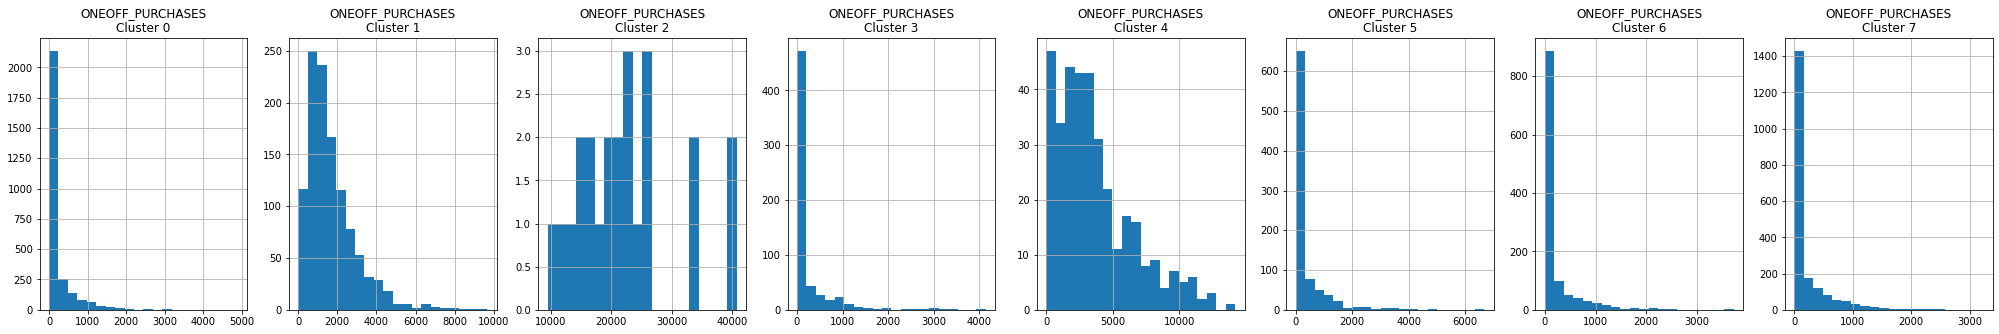

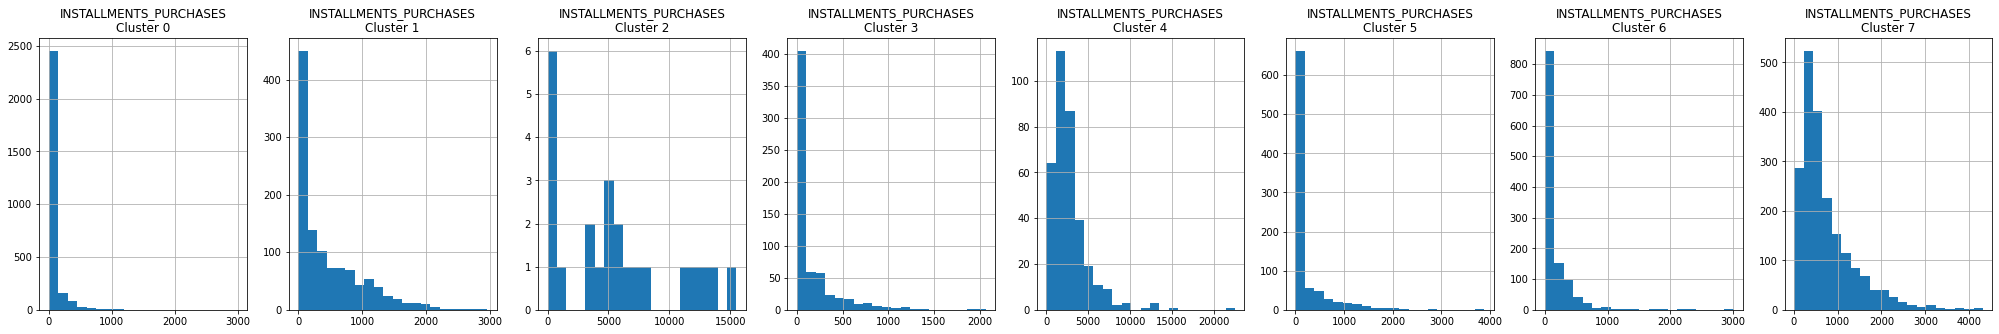

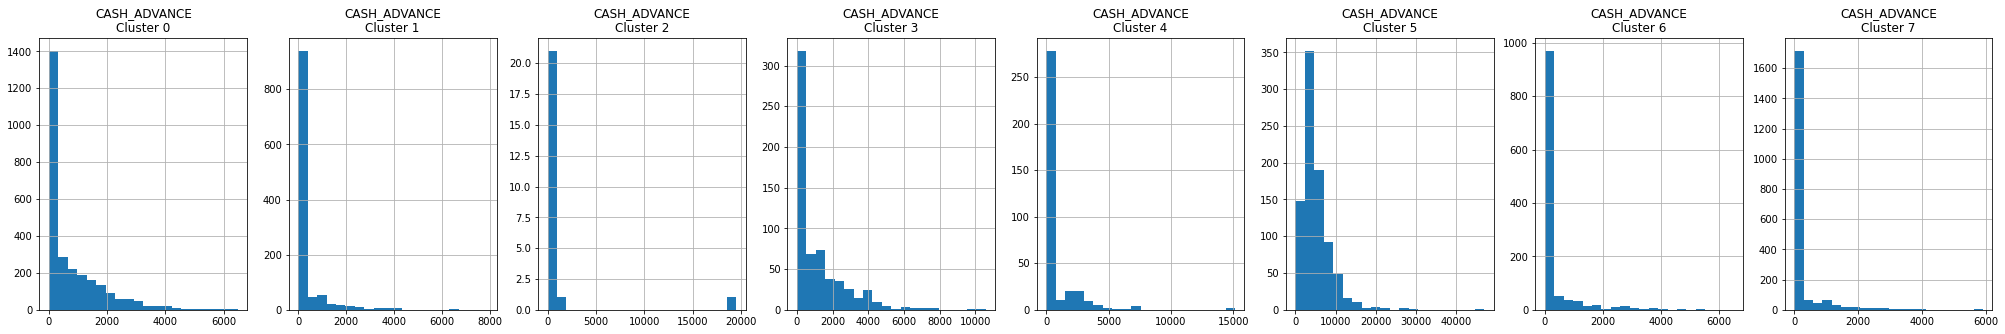

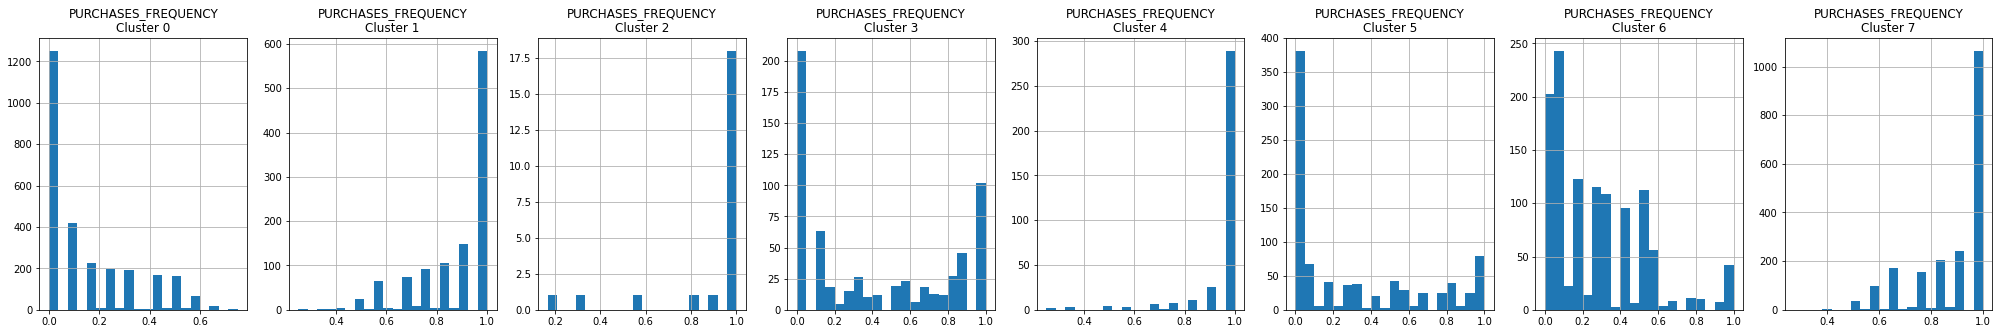

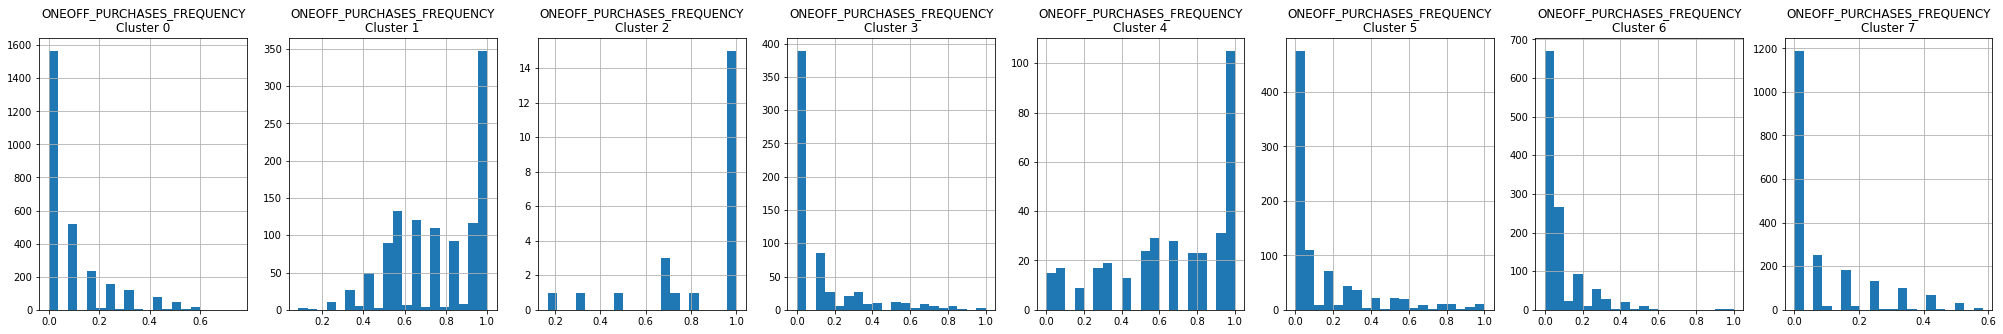

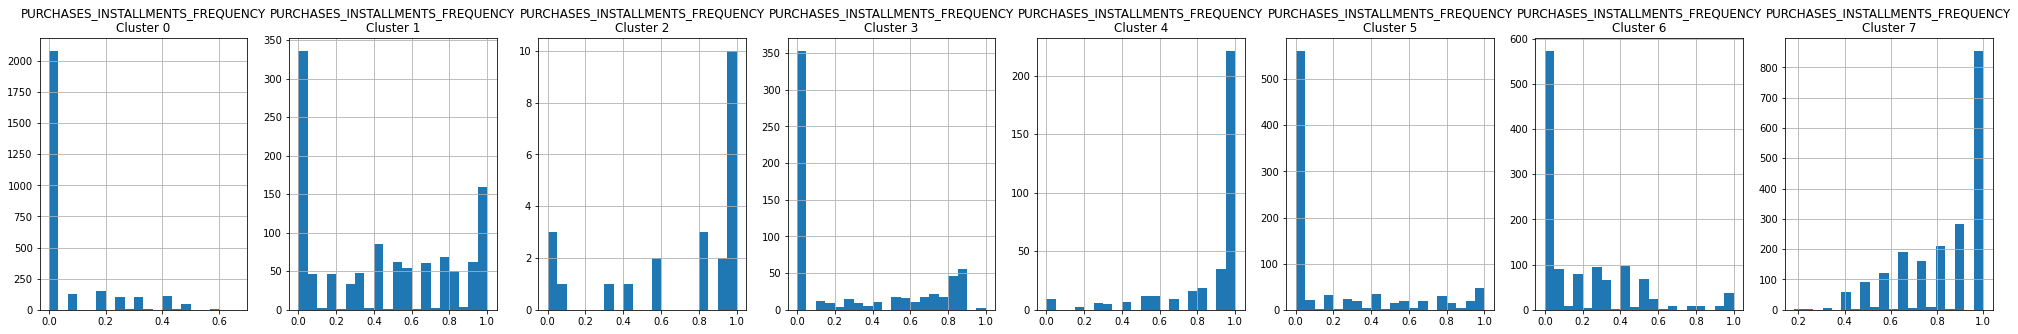

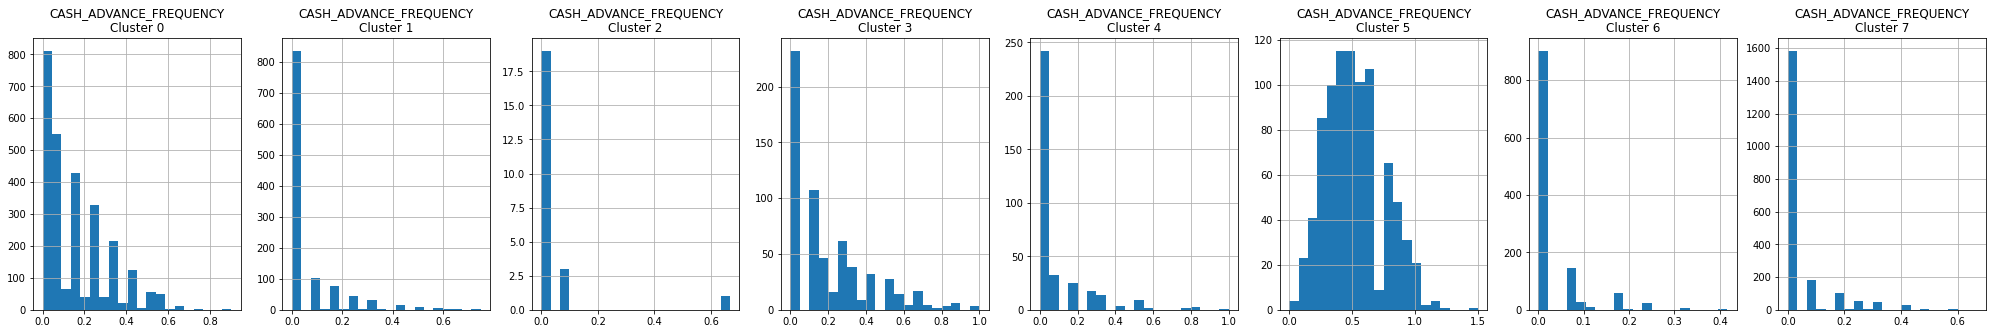

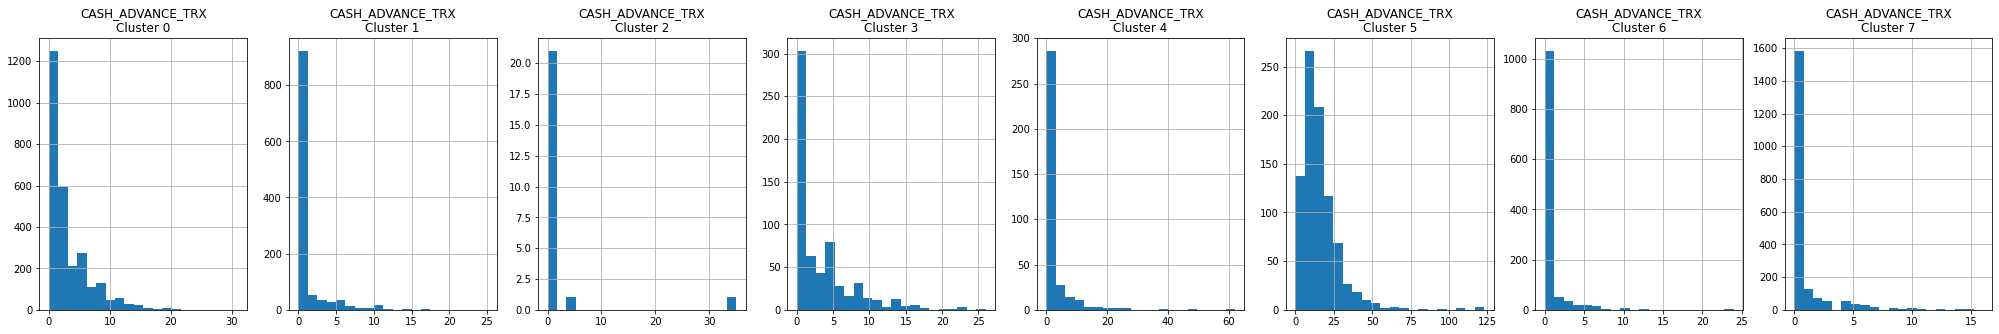

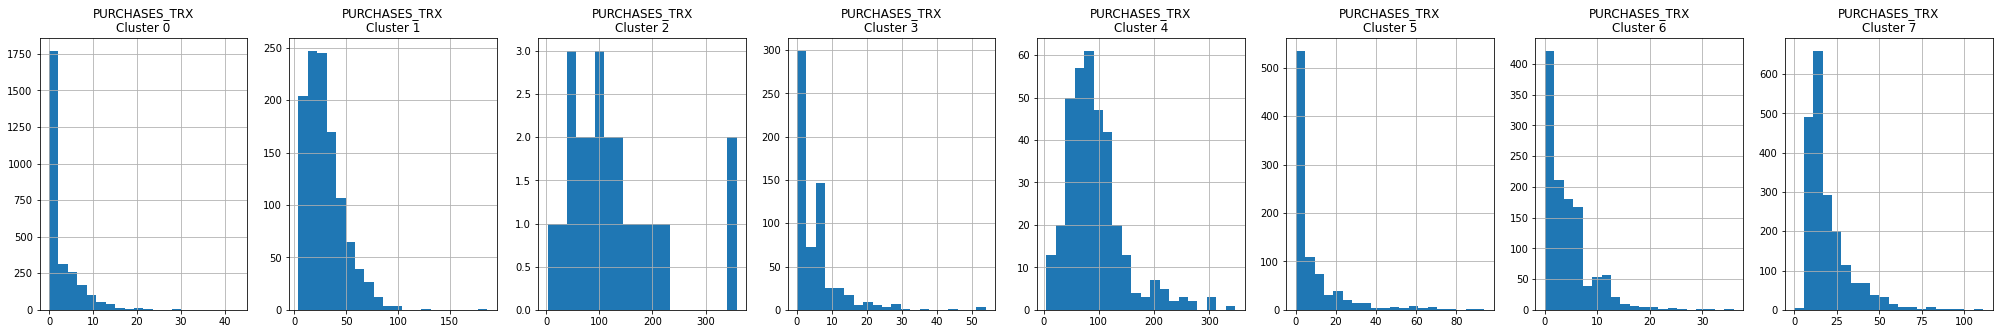

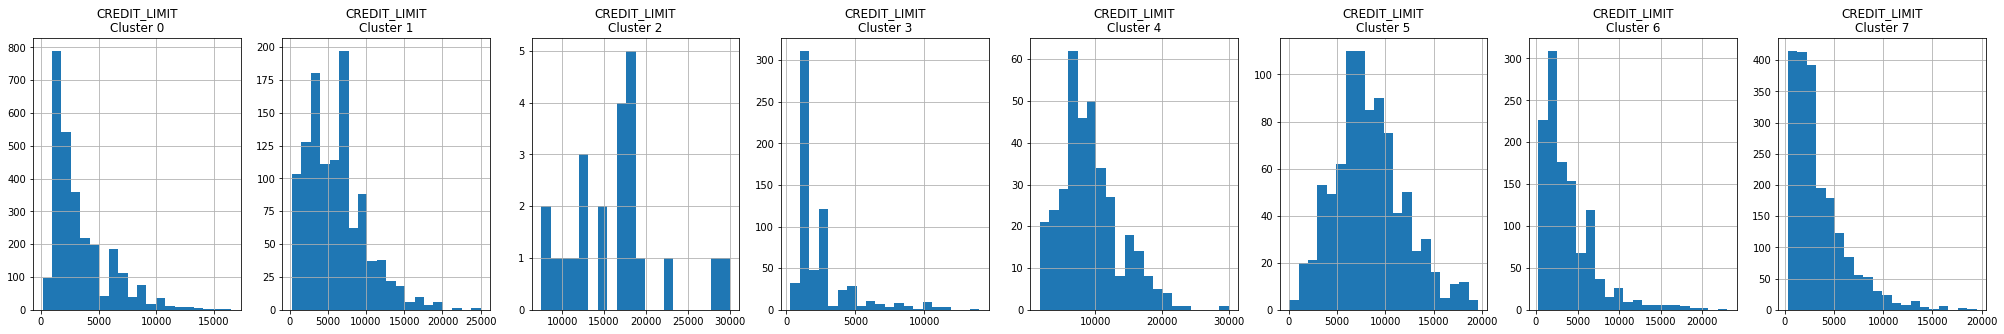

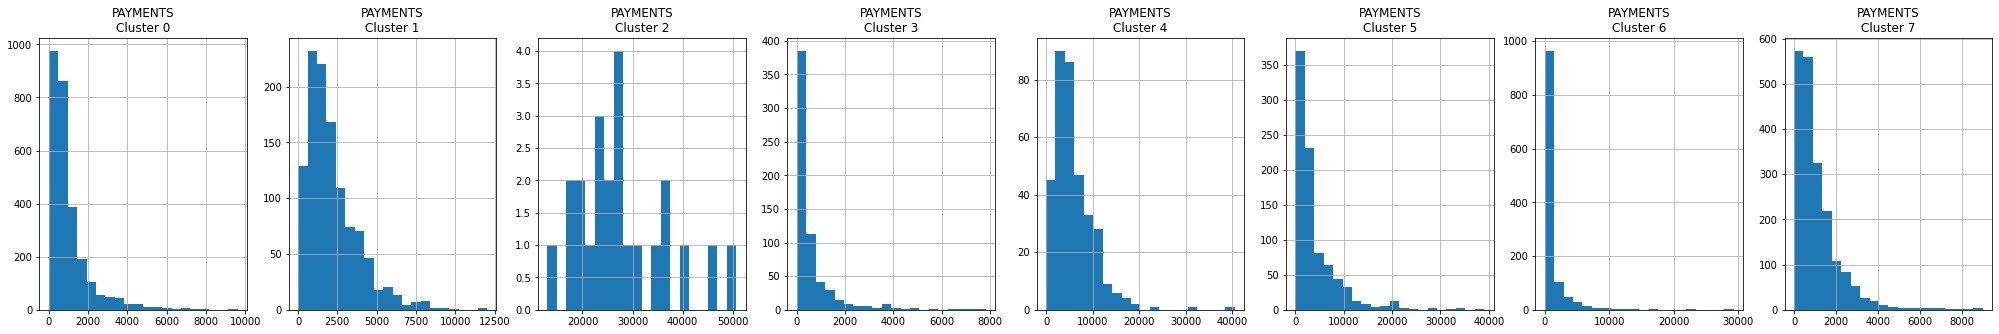

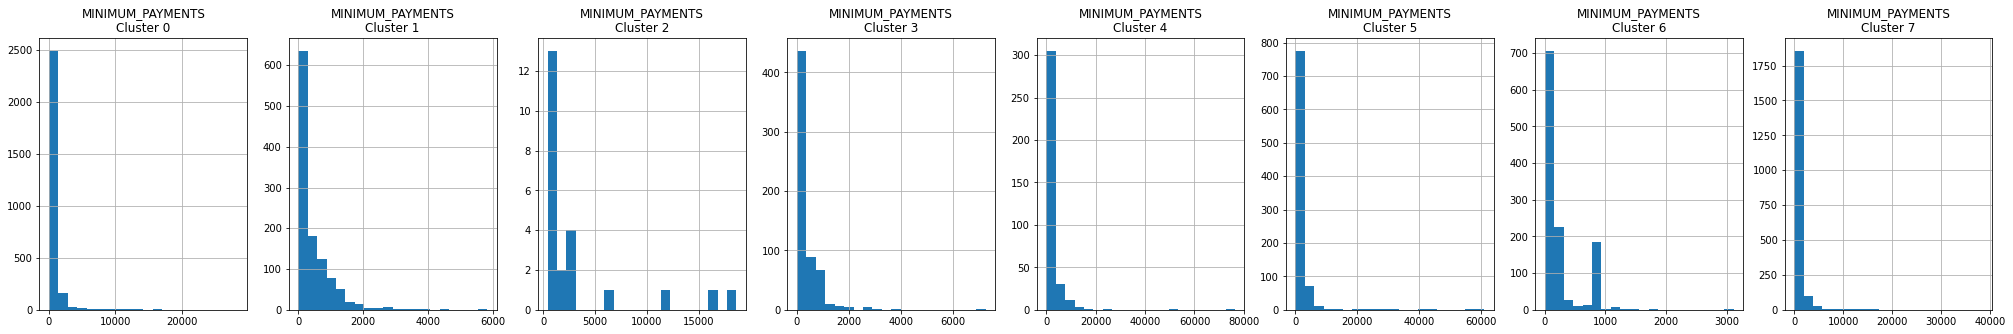

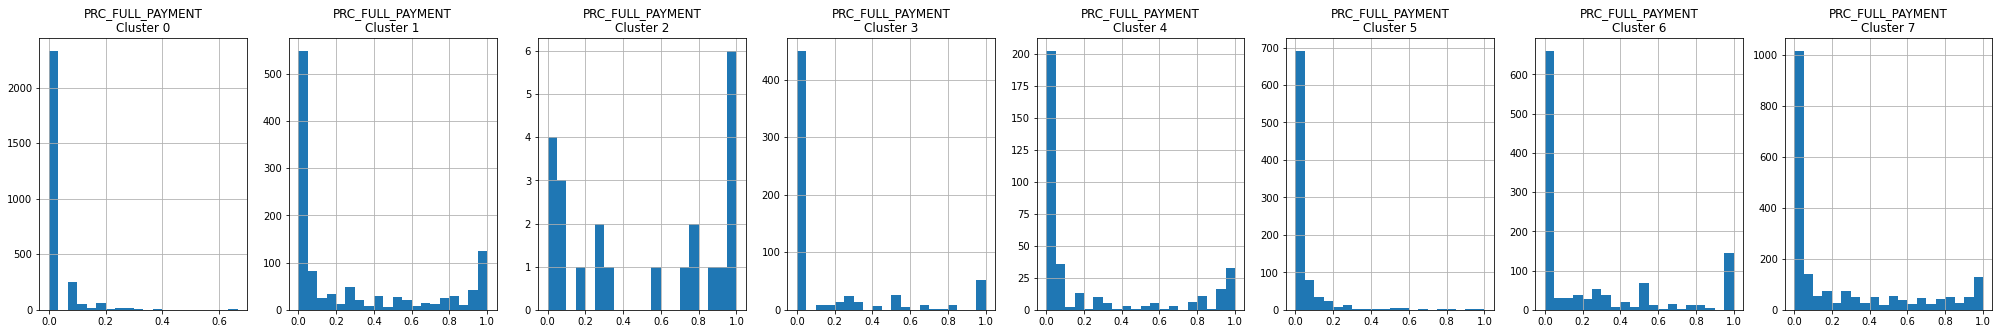

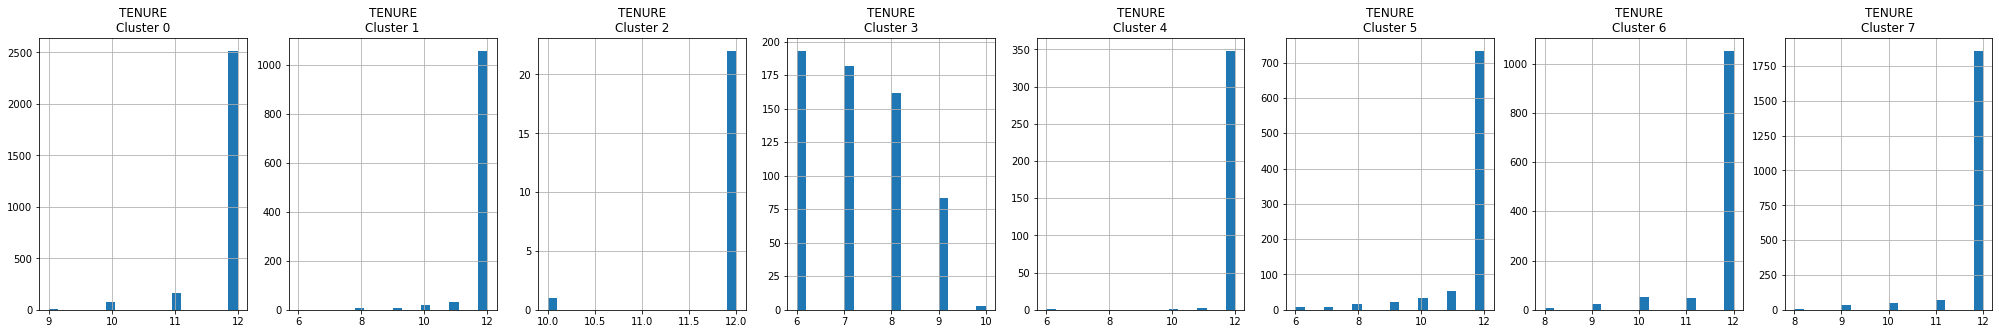

In [36]:
""" Gerando um histograma de cada atributo da base de dados por seu cluster """
for i in cartaocredito_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = cartaocredito_df_cluster[cartaocredito_df_cluster['cluster']==j]
        cluster[i].hist(bins = 20)
        plt.title('{}\nCluster {}'.format(i, j))
    plt.show()

In [37]:
""" Ordenando o Dataset pelo Cluster """
credito_order = cartaocredito_df_cluster.sort_values(by='cluster')
credito_order.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4223,5543.972323,1.000000,0.00,0.00,0.0,2231.203315,0.000000,0.000000,0.000000,0.333333,9,0,6000.0,1265.310930,1978.268240,0.000000,12,0
4225,226.785380,1.000000,210.64,210.64,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,295.155445,176.886468,0.000000,12,0
4226,41.643083,1.000000,212.00,212.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,596.834019,47.139699,0.083333,12,0
4227,291.663664,1.000000,129.00,129.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,284.596786,200.845446,0.000000,12,0


# **Salvando**

In [38]:
""" Salvando arquivo para o uso do departamento de marketing """
credito_order.to_csv('Cluster.csv')